ЛР1 Разведочный анализ с использованием pandas


**Для работы был выбран набор данных о депрессии у студентов с сайта Kaggle**

Этот набор данных исследует связь между психическим здоровьем и различными демографическими, академическими и жизненными факторами. Он включает такие атрибуты, как пол, возраст, академическое давление, удовлетворенность учебой, продолжительность сна, пищевые привычки, часы учебы, финансовый стресс, семейный анамнез психических заболеваний, депрессия и мысли о самоубийстве. Набор данных позволяет исследовать, как такие факторы, как качество сна, диета и академическая нагрузка, влияют на психическое благополучие, предлагая потенциальные приложения для выявления закономерностей рисков для психического здоровья и продвижения превентивных стратегий для улучшения результатов психического здоровья среди различных демографических групп.

Данные для исследования [здесь](https://www.kaggle.com/datasets/ikynahidwin/depression-student-dataset)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # устанавливаем seaborn по умолчанию для отрисовки графиков

In [2]:
train = pd.read_csv('/content/Depression Student Dataset.csv')

In [3]:
train.head()

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,28,2.0,4.0,7-8 hours,Moderate,Yes,9,2,Yes,No
1,Male,28,4.0,5.0,5-6 hours,Healthy,Yes,7,1,Yes,No
2,Male,25,1.0,3.0,5-6 hours,Unhealthy,Yes,10,4,No,Yes
3,Male,23,1.0,4.0,More than 8 hours,Unhealthy,Yes,7,2,Yes,No
4,Female,31,1.0,5.0,More than 8 hours,Healthy,Yes,4,2,Yes,No


1. Gender - пол
2. Age - возраст
3. Academic Pressure - академическая нагрузка
4. Study Satisfaction - удовлетворение от учебы
5. Sleep Duration - продолжительность сна
6. Dietary Habits - пищевые привычки/питание
7. Have you ever had suicidal thoughts ? - мысли о суициде
8. Study Hours - количество учебных часов
9. Financial Stress - финансовые трудности
10. Family History of Mental Illness - душевные проблемы по наследству
11. Depression - депрессия

Посмотрим общую статистику числовых данных.

In [4]:
train.describe()

,Age,Academic Pressure,Study Satisfaction,Study Hours,Financial Stress
count,502.000000,502.000000,502.000000,502.000000,502.000000
mean,26.241036,3.003984,3.075697,6.404382,2.928287
std,4.896501,1.390007,1.373490,3.742434,1.425053
min,18.000000,1.000000,1.000000,0.000000,1.000000
25%,22.000000,2.000000,2.000000,3.000000,2.000000
50%,26.500000,3.000000,3.000000,7.000000,3.000000
75%,30.000000,4.000000,4.000000,10.000000,4.000000
max,34.000000,5.000000,5.000000,12.000000,5.000000


предварительные выводы:

Количество человек: 502

Возрастрой диапазон от 18 до 34 лет

В среднем возраст составляет 26-27 лет

В среднем академическая нагрузка 3 единицы из 5 (средняя)

Минимальная оценка качества удовлетворения от учебы 1, максимальная 5, средняя 3

Максимальная нагрузка по учебным часам 12, минимальная - 0, средняя - 7

Финансовые трудности в основом средние (оценка 3 из 5)




Рассмотрим не числовые данные.

In [5]:
train.describe(include=['O'])

,Gender,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Family History of Mental Illness,Depression
count,502,502,502,502,502,502
unique,2,4,3,2,2,2
top,Male,7-8 hours,Moderate,Yes,No,Yes
freq,267,128,172,260,265,252


Большенство студентов мужчины (267 из 502

Больше 1/5 студентов спят в основном по 7-8 часов

Больше 1/5 студентов питаются умеренно

Больше половины студентов посещали мысли о суициде

Больше половины студентов не имеют передаваемые по наследству психические заболевания

Больше половины студентов имеют депрессию

Рассмотрим типы полей и количество непустых записей.

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 502 non-null    object 
 1   Age                                    502 non-null    int64  
 2   Academic Pressure                      502 non-null    float64
 3   Study Satisfaction                     502 non-null    float64
 4   Sleep Duration                         502 non-null    object 
 5   Dietary Habits                         502 non-null    object 
 6   Have you ever had suicidal thoughts ?  502 non-null    object 
 7   Study Hours                            502 non-null    int64  
 8   Financial Stress                       502 non-null    int64  
 9   Family History of Mental Illness       502 non-null    object 
 10  Depression                             502 non-null    object 
dtypes: flo

In [7]:
train.isnull().sum()

,0
Gender,0
Age,0
Academic Pressure,0
Study Satisfaction,0
Sleep Duration,0
Dietary Habits,0
Have you ever had suicidal thoughts ?,0
Study Hours,0
Financial Stress,0
Family History of Mental Illness,0


Пропуски отсутствуют

Преобразуем категориальный признак Gender на числовой(1 - Male, 0 - Female)

In [8]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
train[['Gender']] = enc.fit_transform(train[['Gender']])
train.head()

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1.0,28,2.0,4.0,7-8 hours,Moderate,Yes,9,2,Yes,No
1,1.0,28,4.0,5.0,5-6 hours,Healthy,Yes,7,1,Yes,No
2,1.0,25,1.0,3.0,5-6 hours,Unhealthy,Yes,10,4,No,Yes
3,1.0,23,1.0,4.0,More than 8 hours,Unhealthy,Yes,7,2,Yes,No
4,0.0,31,1.0,5.0,More than 8 hours,Healthy,Yes,4,2,Yes,No


В Dietary Habits есть 2 значения с одной смысловой нагрузкой, поэтому будет целессобразно объединить их в одно (Умеренно и здорово питаться почти одно и то же)

In [9]:
train['Dietary Habits'].replace('Moderate', 'Healthy', inplace=True)

<ipython-input-9-56b2738aae16>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Dietary Habits'].replace('Moderate', 'Healthy', inplace=True)


Закодируем категориальные объекты Dietary Habits, Have you ever had suicidal thoughts ? в массивы целых чисел

In [10]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
res = enc.fit_transform(train[['Dietary Habits']])
enc.categories_


[array(['Healthy', 'Unhealthy'], dtype=object)]

In [11]:
enc.categories_[0]

array(['Healthy', 'Unhealthy'], dtype=object)

In [12]:
res.toarray()

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [21]:
enc1 = OneHotEncoder()
res1 = enc1.fit_transform(train[['Have you ever had suicidal thoughts ?']])
enc1.categories_

[array(['No', 'Yes'], dtype=object)]

In [22]:
enc1.categories_[0]

array(['No', 'Yes'], dtype=object)

In [23]:
res1.toarray()

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [25]:
train[enc.categories_[0]] = res.toarray()
train[enc1.categories_[0]] = res1.toarray()
train.head()

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression,Healthy,Unhealthy,5-6 hours,7-8 hours,Less than 5 hours,More than 8 hours,No,Yes
0,1.0,28,2.0,4.0,7-8 hours,Healthy,Yes,9,2,Yes,No,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,28,4.0,5.0,5-6 hours,Healthy,Yes,7,1,Yes,No,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,25,1.0,3.0,5-6 hours,Unhealthy,Yes,10,4,No,Yes,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.0,23,1.0,4.0,More than 8 hours,Unhealthy,Yes,7,2,Yes,No,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,31,1.0,5.0,More than 8 hours,Healthy,Yes,4,2,Yes,No,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


Проверим типы полей

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 502 non-null    float64
 1   Age                                    502 non-null    int64  
 2   Academic Pressure                      502 non-null    float64
 3   Study Satisfaction                     502 non-null    float64
 4   Sleep Duration                         502 non-null    object 
 5   Dietary Habits                         502 non-null    object 
 6   Have you ever had suicidal thoughts ?  502 non-null    object 
 7   Study Hours                            502 non-null    int64  
 8   Financial Stress                       502 non-null    int64  
 9   Family History of Mental Illness       502 non-null    object 
 10  Depression                             502 non-null    object 
 11  Health

In [19]:
train.isnull().sum()

,0
Gender,0
Age,0
Academic Pressure,0
Study Satisfaction,0
Sleep Duration,0
Dietary Habits,0
Have you ever had suicidal thoughts ?,0
Study Hours,0
Financial Stress,0
Family History of Mental Illness,0


**Визуализация распределений**

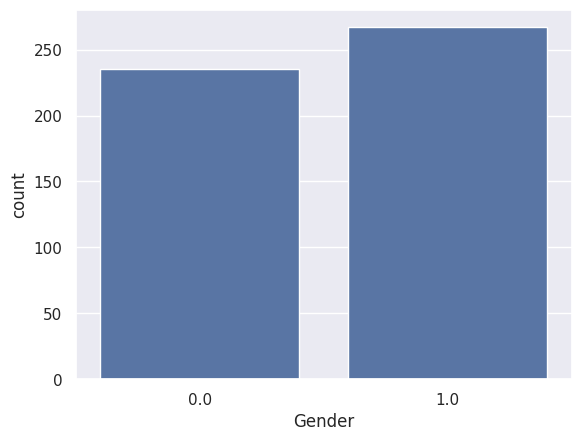

In [54]:
sns.countplot(x=train["Gender"]);

Мужчин студентов больше, чем женщин

<Axes: xlabel='Age_group', ylabel='count'>

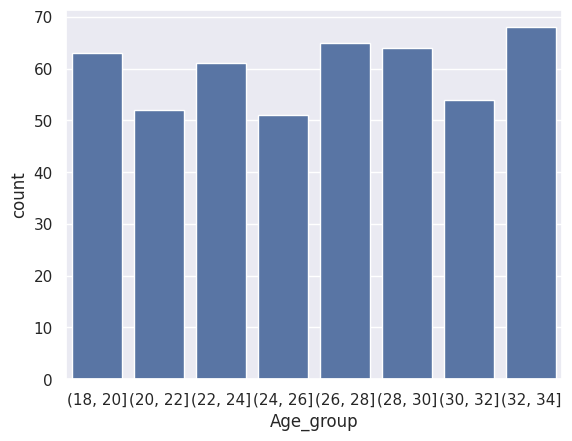

In [55]:
train["Age_group"] = pd.cut(x=train['Age'], bins=[18, 20, 22, 24, 26, 28, 30, 32, 34])
sns.countplot(x=train["Age_group"])

Большенство студентов имеют возраст в районе 18-20, 26-28 и 32-34

(array([ 99.,   0.,  88.,   0.,   0., 125.,   0.,  92.,   0.,  98.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

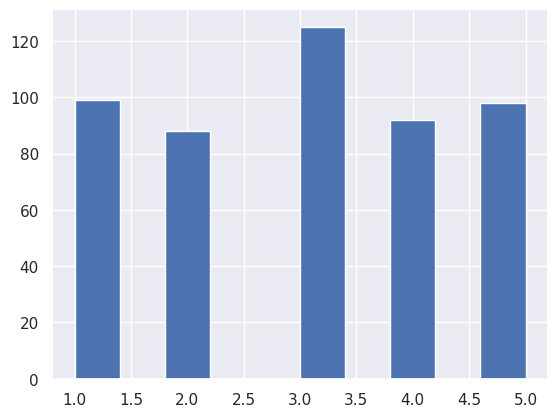

In [56]:
plt.hist(train['Academic Pressure'])

В большинстве средняя академическая нагрузка (3 единицы из 5)

<Axes: xlabel='Study Satisfaction', ylabel='count'>

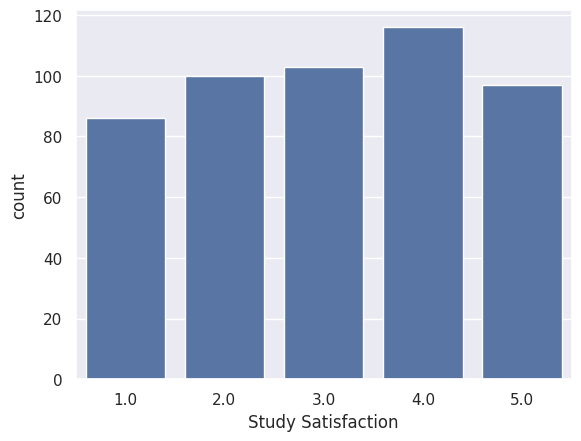

In [57]:
sns.countplot(x=train["Study Satisfaction"])

Большинство удовлетворены учебой (4 из 5)

<Axes: xlabel='Study Hours_group', ylabel='count'>

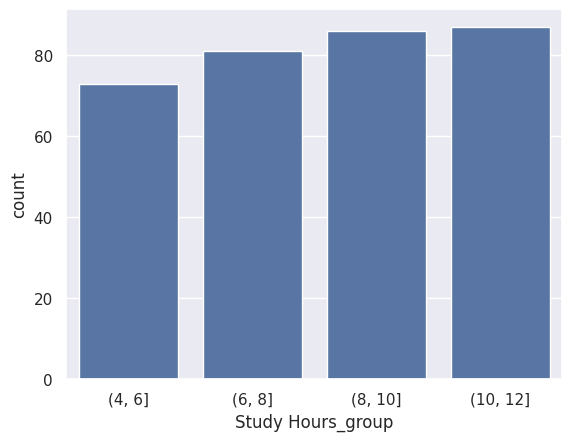

In [36]:

train["Study Hours_group"] = pd.cut(x=train['Study Hours'], bins=[4, 6, 8, 10, 12])
sns.countplot(x=train["Study Hours_group"])

Большинство студентов имеют нагрузку от 8 до 12 часов в день

<Axes: xlabel='Depression', ylabel='count'>

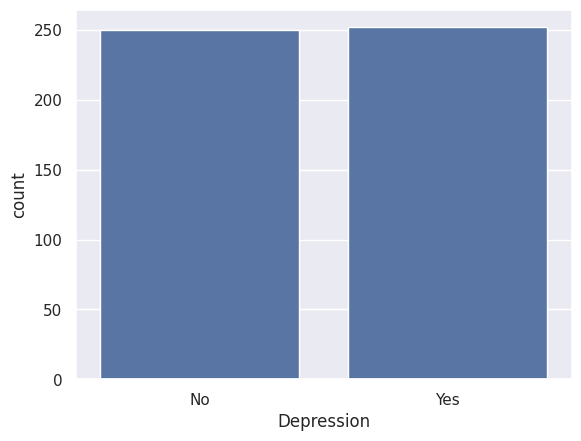

In [38]:
sns.countplot(x=train["Depression"])

Почти одинаковое количество студентов как имеют, так и не имеют депрессию

<Axes: xlabel='Have you ever had suicidal thoughts ?', ylabel='count'>

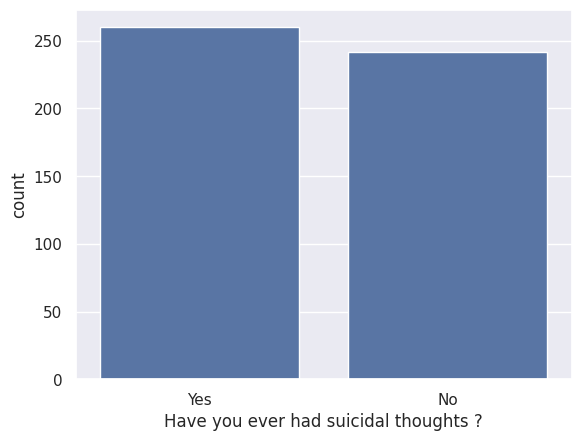

In [39]:
sns.countplot(x=train["Have you ever had suicidal thoughts ?"])

Достаточно много студентов хотят покончить жизнь самоубийством

(array([110.,   0., 102.,   0.,   0., 100.,   0.,  94.,   0.,  96.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

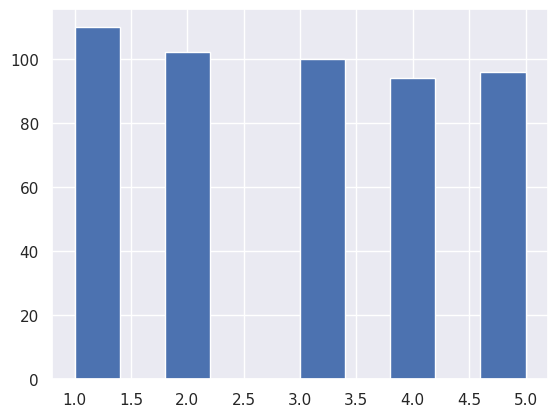

In [40]:
plt.hist(train['Financial Stress'])

Большинство не имеют проблем с финансами

(array([237.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 265.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

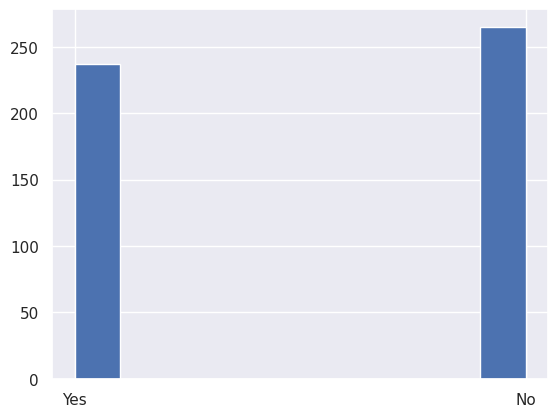

In [41]:
plt.hist(train['Family History of Mental Illness'])

У большиснвта людей нет проблем с наследственными психическими заболеваниями

<Axes: xlabel='Dietary Habits', ylabel='count'>

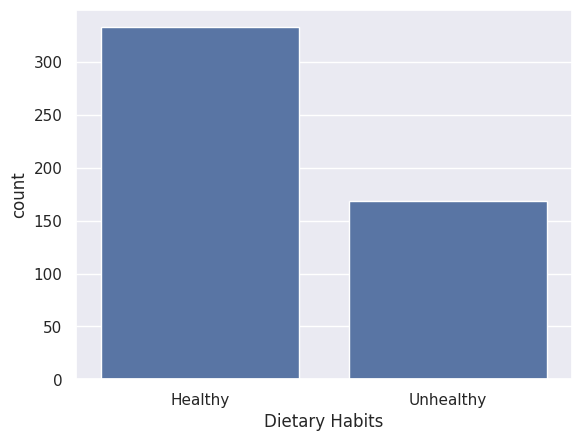

In [58]:
sns.countplot(x=train["Dietary Habits"])

Люди, которые хорошо питаются преобладают в количестве

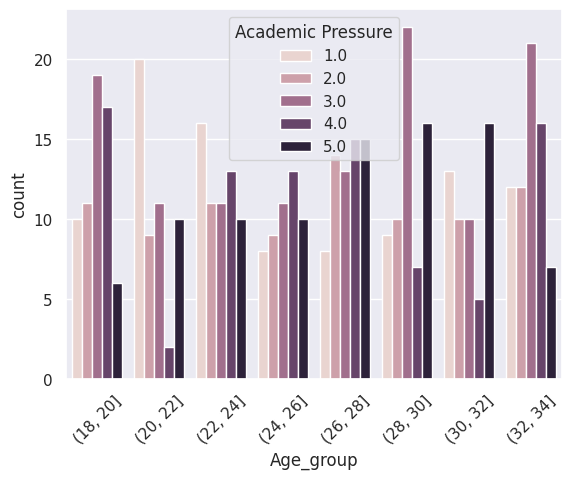

In [60]:
train["Age_group"] = pd.cut(x=train['Age'], bins=[18, 20, 22, 24, 26, 28, 30, 32, 34])
plt.xticks(rotation=45)
sns.countplot(data=train, hue='Academic Pressure', x='Age_group');

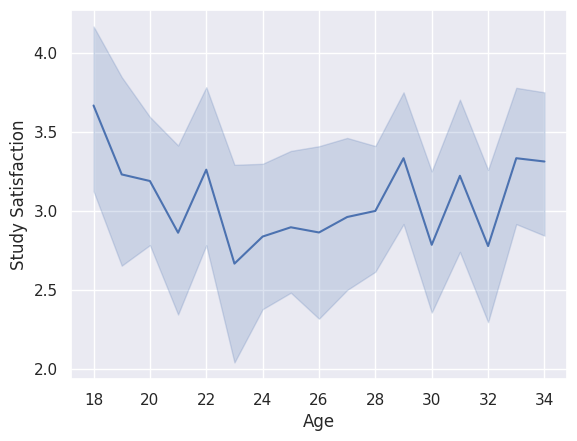

In [62]:
sns.lineplot(data=train, x='Age', y='Study Satisfaction');

Люди испытывают удовлетворение от учебы в 18 лет, и в промежутке от 28 до 30

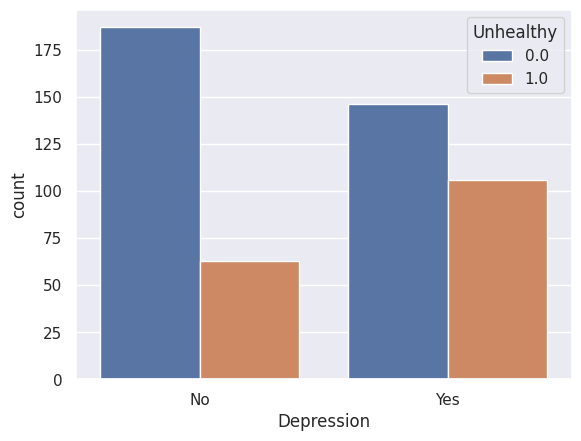

In [69]:
sns.countplot(data=train, hue='Unhealthy', x='Depression');

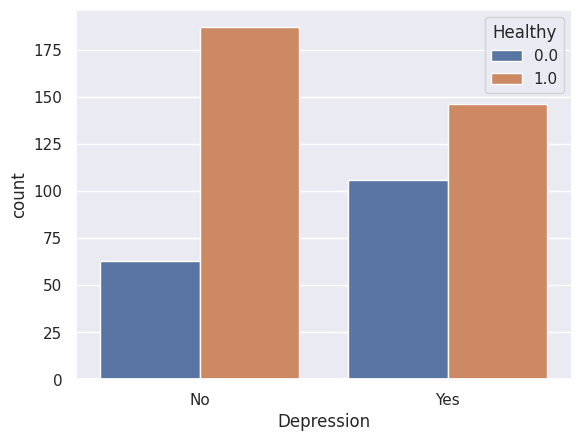

In [70]:
sns.countplot(data=train, hue='Healthy', x='Depression');

Люди, которые правильно питаются не испытвают депрессии

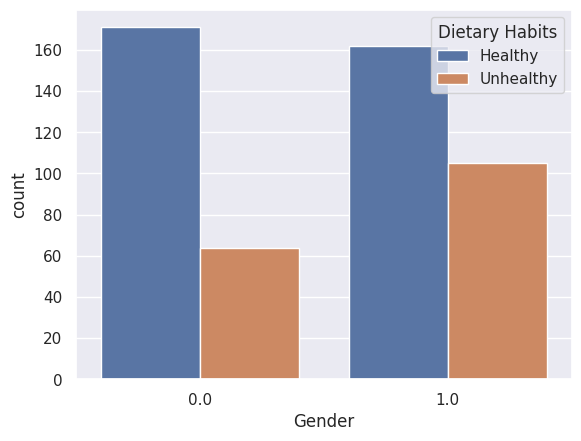

In [68]:
sns.countplot(data=train, hue='Dietary Habits', x='Gender');

Чаще правильнее питаются женщины, нежели мужчины

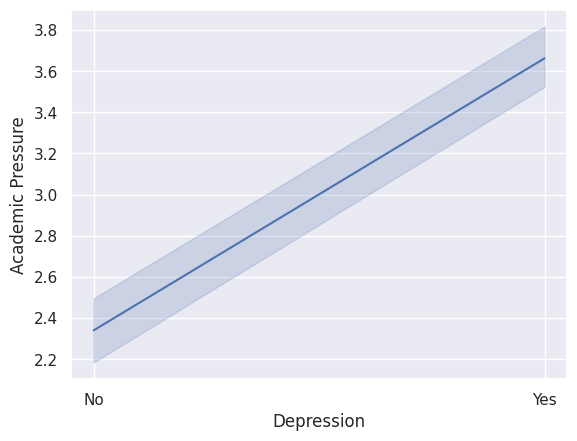

In [75]:
sns.lineplot(data=train, x='Depression', y='Academic Pressure');

Депрессия появляется с увеличением количества часов нагрузки

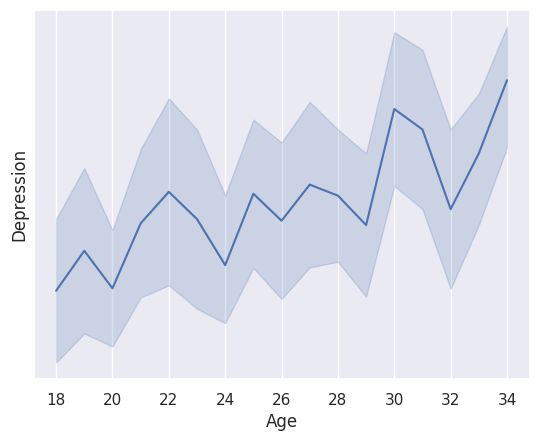

In [78]:
sns.lineplot(data=train, x='Age', y='Depression');

Депрессия может постепенно развиваться с возарстом

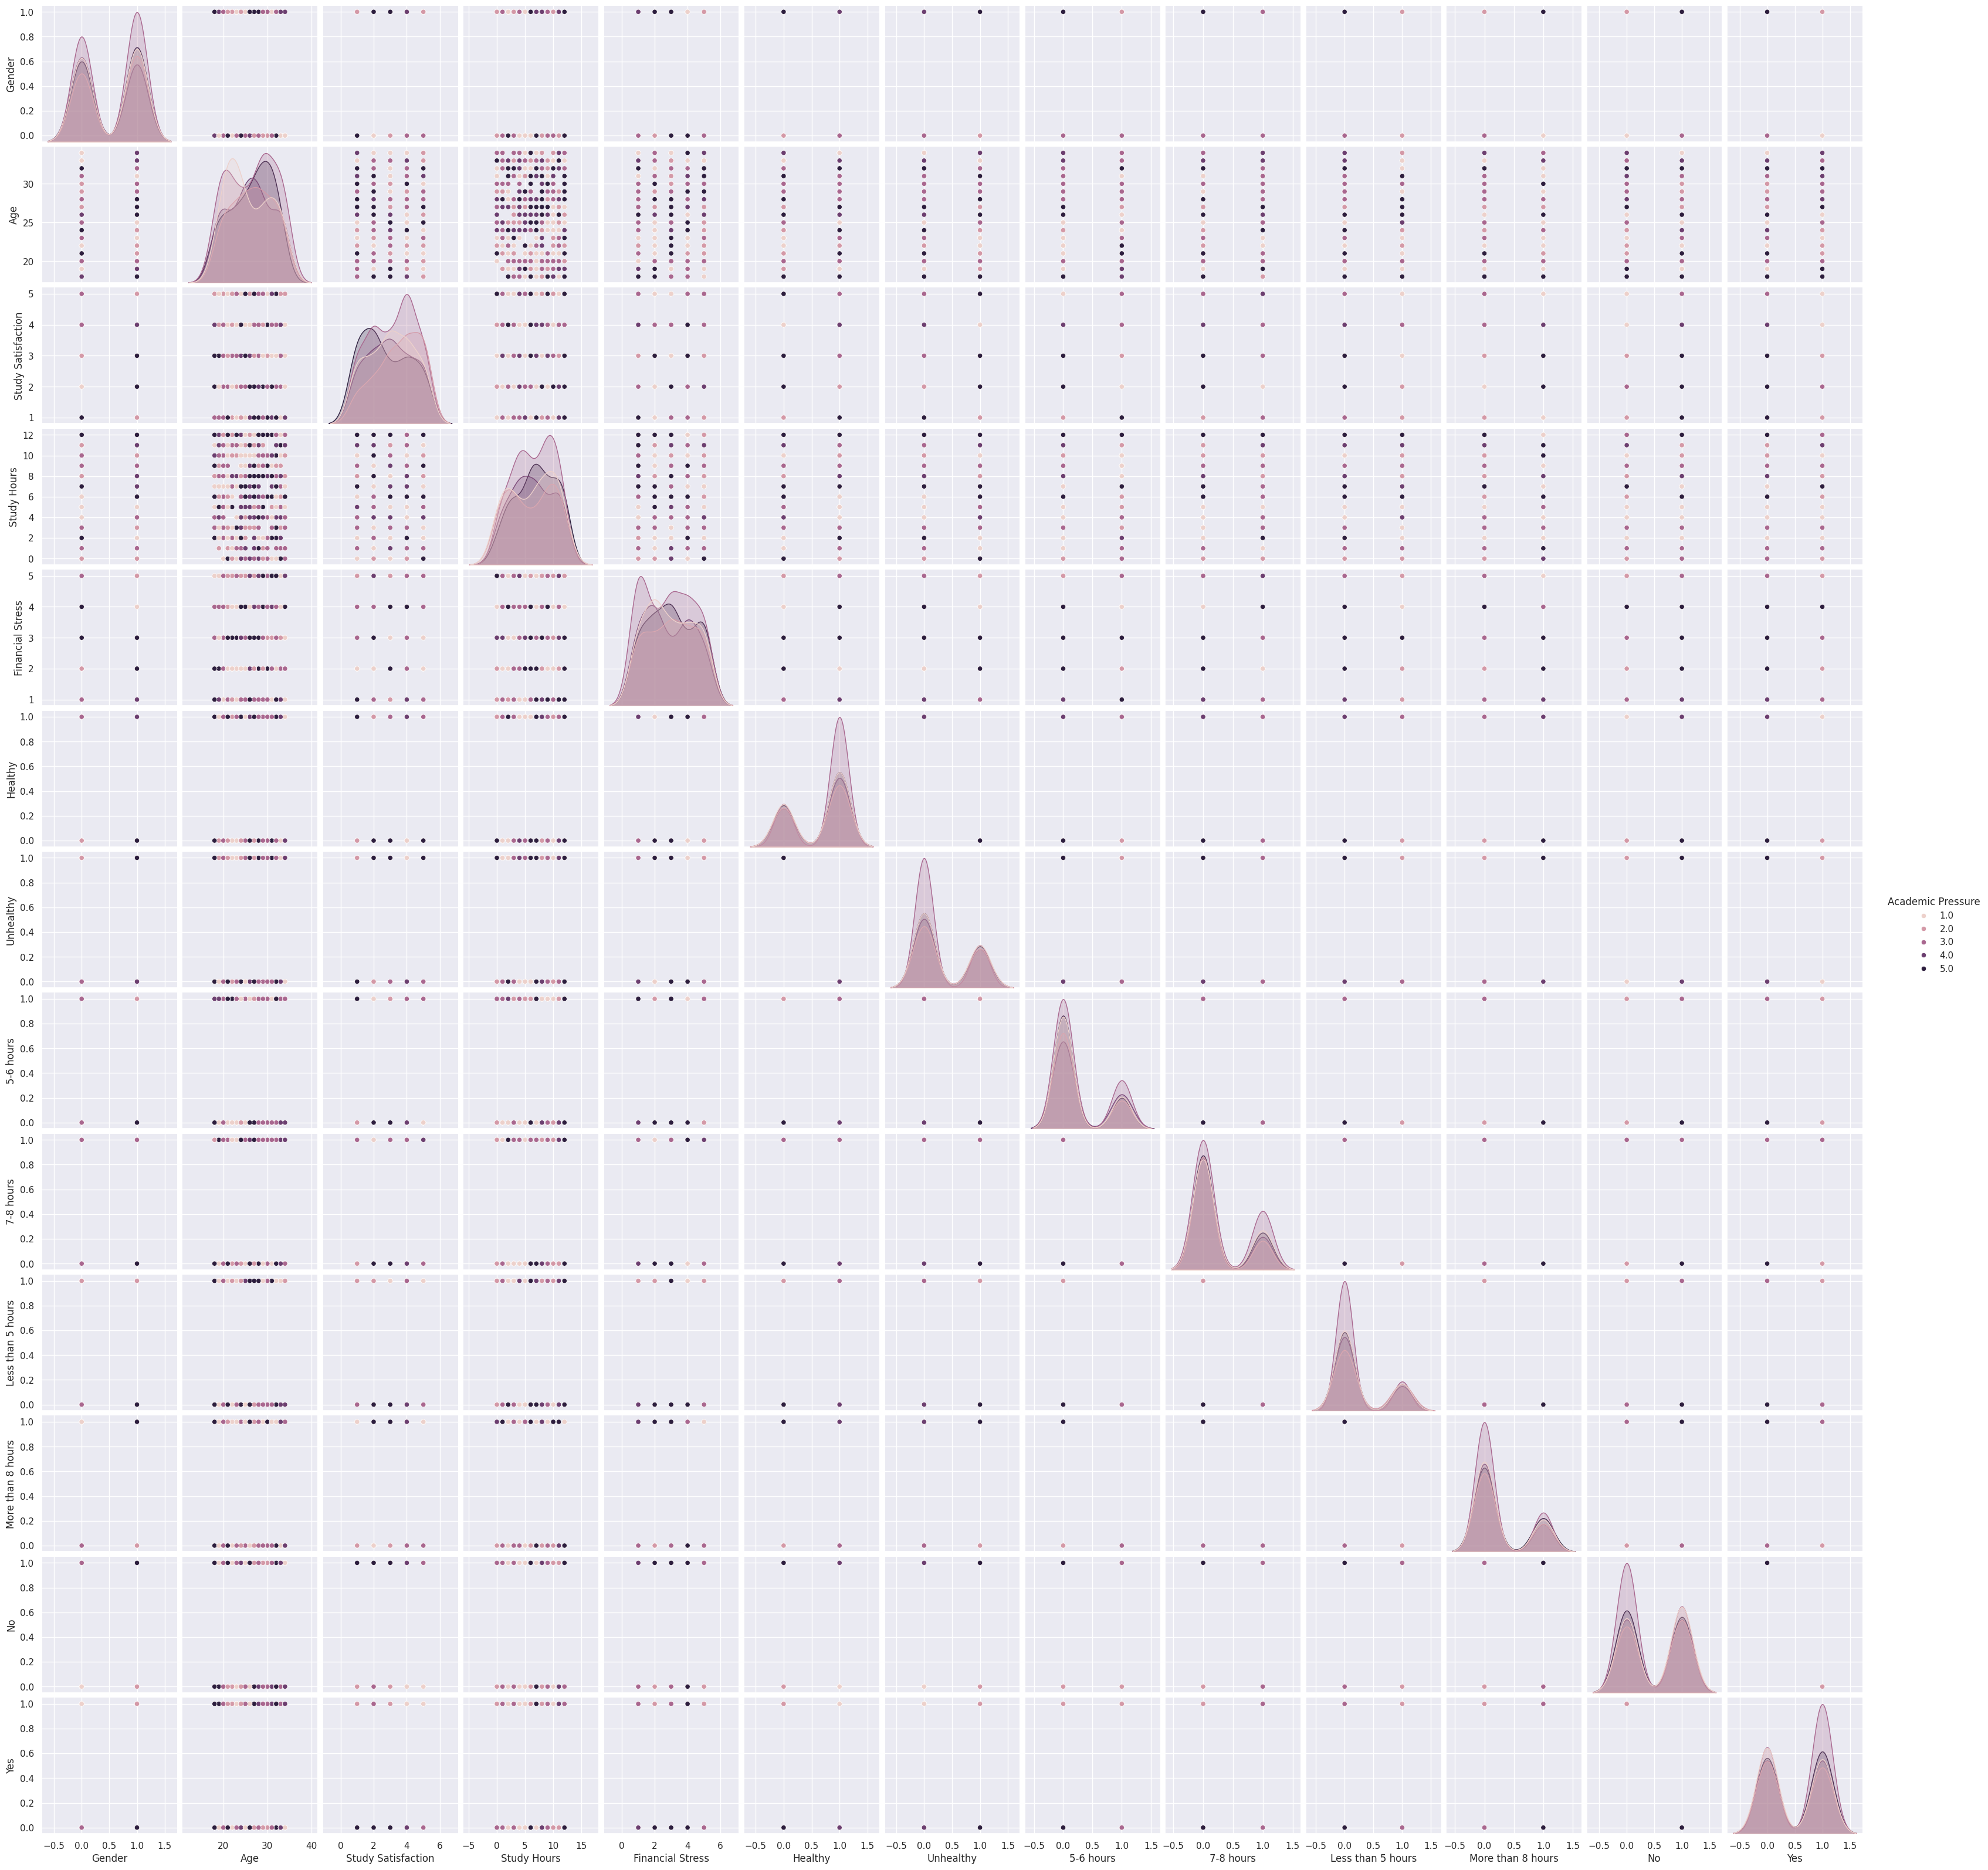

In [79]:
sns.pairplot(train, kind="scatter", hue="Academic Pressure");

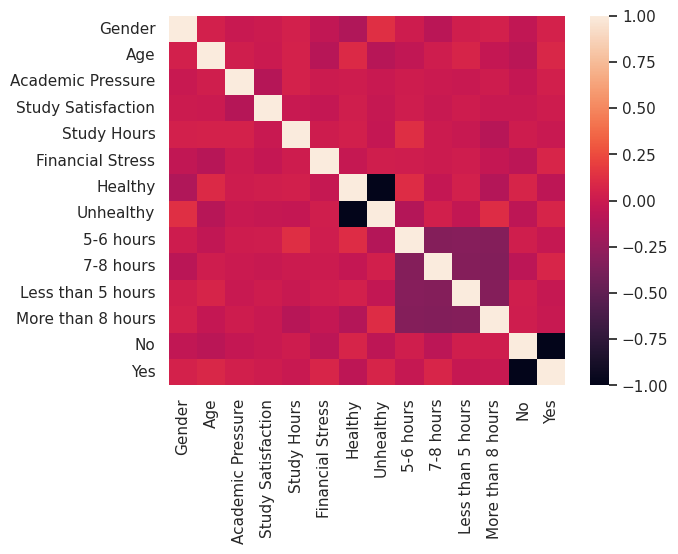

In [80]:
sns.heatmap(train.corr(numeric_only = True));